# ***Funções e Bibliotecas Utilizadas***
Aqui estão todas as funções e as bibliotecas que serão utilizadas para a resolução da tarefa e para execução do código.

A função **Read()** foi utilizada para abrir arquivos. Ela abre um arquivo, copia os dados desse arquivo para a variável ArqContent, fecha o arquivo e retorna a variável ArqContent.

A função **Clean()**, função adaptada [1], recebe uma lista contendo diversos caracteres, a variável **Lixo** conterá os caracteres a serem removidos, a variável **Limpando** conterá a lista recebida pela função com as letras minusculas e com os caracteres contidos na variável **Lixo**  removidos, isso será feito pela função **lower()** que deixa o caractere em minusculo e a função **strip** que retorna a cópia da lista  com os caracteres removidos, no final antes de retornar a nova lista função verificará se toda a lista esta formada apenas por caracteres com letras do alfabeto e  hífen (-).

A função **Countc()** foi utilizada para contar o número de caracteres.Ela recebe uma lista de caracteres,percorre essa lista com um contador e retorna esse contador.

A função **Ocurrences()** função adaptada [1], foi utilizada para verificar a ocorrência de determinada palavra em uma lista. Ela recebe um lista contendo determinado conjunto de palavras e cria um dicionario o **Dict** e  esse dicionario está representado por **defaultdict(int)** o que resultará na seguinte situação, caso a chave não estiver representada no dicionário ela será representada relacionando a chave ao valor 0,ou seja,dado uma lista de palavras a verificação de ocorrência dessa palavra será definida pela chave, sempre que a chave for igual, **Dict** será incrementado, quando uma nova chave for descoberta será atribuída ao valor 0 e será pesquisado mais dessa chave na lista, quando toda lista for percorrida a variavel **Dict** será retornado pela função.

In [107]:
from typing import Dict
from collections import defaultdict
nltk.download('all')
import nltk
from nltk import word_tokenize
import matplotlib.pyplot as plt


def Read(FileName):
  Arquivo = open(FileName, 'r', encoding='utf-8')
  ArqContent = Arquivo.read()
  Arquivo.close()
  return ArqContent


def Clean(lista):
  Lixo = '.,:.;?!"`()[]{}\/|#$%^&*'
  Limpando = [newlist.strip(Lixo).lower() for newlist in lista]
  return [newlist for newlist in Limpando if newlist.isalpha() or '-' in newlist]

def CountC(lista):
  contador = 0
  for contador in range(len(lista)):
    pass
  return contador

def Occurrences(lista):
    Dict = defaultdict(int)
    for p in lista:
       Dict[p] += 1
    
    return Dict

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

# ***Abrindo os Arquivos .txt***
Como a tarefa necessitará de dois arquivos para  resolução, o código abaixo mostra a abertura dos mesmo, a variável que guardará os dados do livro Memórias Póstumas está denominada como **LivroMP**, enquanto a que guardará os dados do Livro Dom Casmurro está denominada como **LivroDC**.

In [106]:
LivroMP = Read('MemóriasPóstumas.txt')
LivroDC = Read('DomCasmurro.txt')

#***Contando os números de caracteres***
O código abaixo conta o número de caracteres de determinada lista, nesse caso a lista que terá seus caracteres calculados será a **LivroMP** que representa o livro 'Memórias Póstumas', a váriavel **NumeroCaracteres** guardará o valor retornado pela função **Countc()**.

In [108]:
NumeroCaracteres = CountC(LivroMP)

print("Numero de Caracteres: ",NumeroCaracteres)


Numero de Caracteres:  355705


# ***Limpeza de Conjunto, palavras do texto e  riqueza lexical***
Nessa parte a função **word_tokenize()** irá separar a string LivroMP em uma lista de tokens, essa lista será atribuída a variável **PalavrasMP** e  terá alguns caracteres removido pela função **Clean()**, caracteres como '.' e '#'.
Para calcular a quantidade de palavras no texto, será necessário a contagem apenas de palavras não repetidas, portanto a função **set()** foi utilizada no código, ela transforma a lista **PalavrasMP** em um conjunto desordenado e sem elementos iguais, esse conjunto é atribuído a variável **QuantPalavras**, após isso o calculo da quantidade de palavras é feita pela função **len()** que retorna o tamanho da variável **QuantPalavras**.
O cálculo de riqueza lexical foi feito dividindo a quantidade de palavras que não são duplicatas pelo numero total de palavras.

In [109]:

PalavrasMP = word_tokenize(LivroMP)
PalavrasMP = Clean(PalavrasMP)
QuantPalavras = set(PalavrasMP)
RiquezaLexical = len(QuantPalavras)/len(PalavrasMP)

print("Numero de PalavrasMP: ",len(QuantPalavras))
print("Riqueza lexical: ",RiquezaLexical)

Numero de PalavrasMP:  10429
Riqueza lexical:  0.1730609671102851


# ***Representação textual das palavras semelhantes entre as mais frequentes dos arquivos***

Aqui é a representação das palavras que estão entre as vinte mais frequentes nos dois arquivos. Primeiramente é feita a tokenização e a limpeza do texto Dom Casmurro , da mesma forma que foi feita para o texto Memórias Póstumas, depois é definido o total de ocorrências das palavras dos dois textos pela função **Occurrences()** a qual retorna um valor que é guardado nas variáveis  **DictMP** e **DictDC** que representam as ocorrências dos textos Memórias Póstumas e Dom Casmurro respectivamente.
A função **sorted()** é utilizada para ordenar os 20 maiores valores das variáveis **DictMP** e **DictDC**,ou seja, ele organizará as 20 palavras com mais ocorrência em ambos os textos.
O primeiro **for** é para o conjunto de palavras do texto Memórias Póstumas e o segundo **for** para o de Dom Casmurro, no segundo **for** será feita uma comparação da palavra do texto Memórias Póstumas com todas as palavras do texto Dom Casmurro,se alguma delas forem iguais sua informações serão guardadas na variável **PalavrasSemelhantes**.

In [110]:
DictMP = Occurrences(PalavrasMP)
PalFrequentesMP = sorted(DictMP.items(), key=lambda tupla:tupla[1], reverse=True)[:20]

PalavrasDC = word_tokenize(LivroDM)
PalavrasDC = Clean(PalavrasDC)
DictDC = Occurrences(PalavrasDC)
PalFrequentesDC = sorted(DictDC.items(), key=lambda tupla:tupla[1], reverse=True)[:20]

PalavrasSemelhantes = ''
for Palavras, n  in PalFrequentesMP:
  for PalavrasD, d in PalFrequentesDC:
       if(Palavras == PalavrasD):
              PalavrasSemelhantes += Palavras + '\t' +' Quantidade Mémorias Póstumas: ' + str(n) +'\t' + '  Quantidade Dom Casmurro: ' + str(d) + '\n' 
             

print(PalavrasSemelhantes)

a	 Quantidade Mémorias Póstumas: 2490	  Quantidade Dom Casmurro: 2483
que	 Quantidade Mémorias Póstumas: 2203	  Quantidade Dom Casmurro: 2684
de	 Quantidade Mémorias Póstumas: 2117	  Quantidade Dom Casmurro: 1975
e	 Quantidade Mémorias Póstumas: 1949	  Quantidade Dom Casmurro: 2185
o	 Quantidade Mémorias Póstumas: 1711	  Quantidade Dom Casmurro: 1667
não	 Quantidade Mémorias Póstumas: 1164	  Quantidade Dom Casmurro: 1524
um	 Quantidade Mémorias Póstumas: 989	  Quantidade Dom Casmurro: 771
do	 Quantidade Mémorias Póstumas: 688	  Quantidade Dom Casmurro: 595
da	 Quantidade Mémorias Póstumas: 650	  Quantidade Dom Casmurro: 626
com	 Quantidade Mémorias Póstumas: 581	  Quantidade Dom Casmurro: 536
era	 Quantidade Mémorias Póstumas: 511	  Quantidade Dom Casmurro: 556
é	 Quantidade Mémorias Póstumas: 508	  Quantidade Dom Casmurro: 715
os	 Quantidade Mémorias Póstumas: 486	  Quantidade Dom Casmurro: 660
eu	 Quantidade Mémorias Póstumas: 476	  Quantidade Dom Casmurro: 532
se	 Quantidade Mémoria

# ***Representação Gráfica das vinte palavras mais frequentes nos arquivos***
Aqui se encontra a representação gráfica das palavras 20 mais frequentes nos dois arquivos.

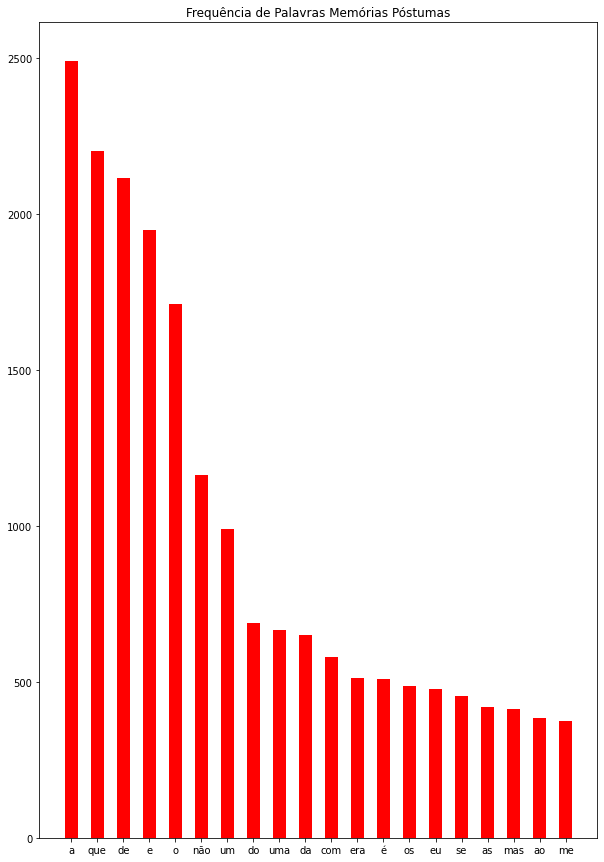

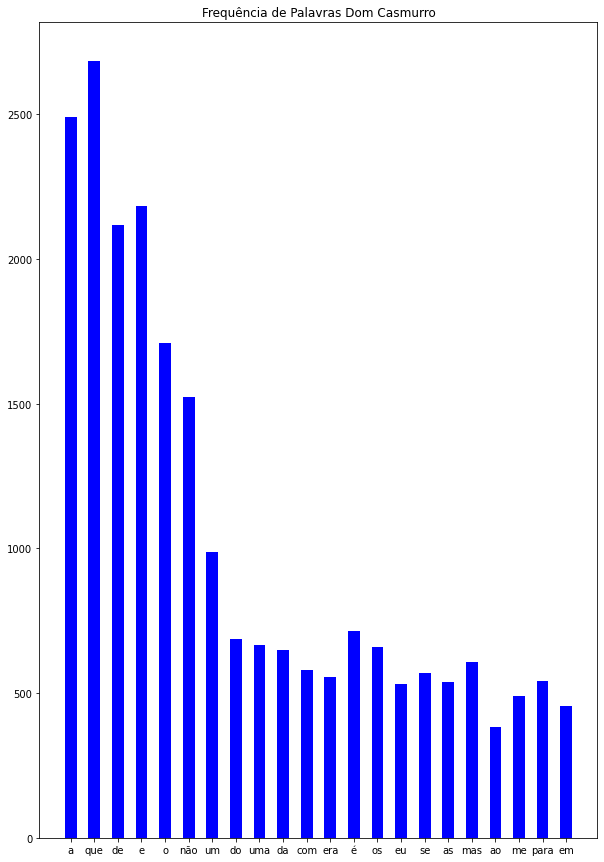

In [111]:
valor = []
freq = []
for Palavras, n  in PalFrequentesMP:
          valor.append(Palavras)
          freq.append(n)

plt.title("Frequência de Palavras Memórias Póstumas")
plt.bar(valor, freq,width = 0.5, color='red')
plt.gcf().set_size_inches(10, 15)
plt.show()

for Palavras, n  in PalFrequentesDC:
          valor.append(Palavras)
          freq.append(n)

plt.title("Frequência de Palavras Dom Casmurro")
plt.bar(valor, freq,width = 0.5, color='blue')
plt.gcf().set_size_inches(10, 15)
plt.show()





#***Referências***

[1] Flávio Belizário da Silva Mota.   **Introdução ao Processamento de Linguagem Natural (PLN)**.              
Disponível em
https://github.com/flavio-mota/fundamentos-pln/blob/master/CIC260_Introdu%C3%A7%C3%A3o_ao_Processamento_de_Linguagem_Natural.ipynb.    Acesso em: Novembro de 2021.

[2] PYTHON SOFTWARE FOUNDATION. **A Biblioteca Padrão do Python 2021** . Disponível em: <https://docs.python.org/pt-br/3/library/>. Acesso em: 15 de nov. de 2021.